<a href="https://colab.research.google.com/github/adityamishra5050/Individual-household-electric-power-consumption-/blob/main/DL_Assignment_2_Questio2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
''' Question 2) The dataset you have been given is Individual household electric power consumption
    dataset. [35]
(i)Split the dataset into train and test (80:20) and do the basic preprocessing. [10]
(ii) Use LSTM to predict the global active power while keeping all other important
features and predict it for the testing days by training the model and plot the real global active
power and predicted global active power for the testing days and comparing the results. [15]
(iii) Now split the dataset in train and test (70:30) and predict the global active power for
the testing days and compare the results with part (ii).'''

' Question 2) The dataset you have been given is Individual household electric power consumption\n    dataset. [35]\n(i)Split the dataset into train and test (80:20) and do the basic preprocessing. [10]\n(ii) Use LSTM to predict the global active power while keeping all other important\nfeatures and predict it for the testing days by training the model and plot the real global active\npower and predicted global active power for the testing days and comparing the results. [15]\n(iii) Now split the dataset in train and test (70:30) and predict the global active power for\nthe testing days and compare the results with part (ii).'

In [ ]:
# In This part of the code we are just mounting our drive to the google colab for accessing our dataset easyly so that we don't have to
# download it again and again.

# for this part we are just importing a keyword drive from the library google.colab
from google.colab import drive
# and the fallowing code is for mounting our drive with this google colab editor.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# The path for accessing for given data set is given as
# for dataset , the path is as fallowing "/content/drive/MyDrive/household_power_consumption.txt"

In [ ]:
# now we are importing some libraries such as pandas for readind my dataset
import pandas as pd
import numpy as np

In [ ]:
# with the help of pandas library we are reading the dataset by the path which is defined above and using the separation by ";" and na values are removed and date
# and time are saperated with the help of the arguements passed by the pd.read_csv function.
whole_data_set = pd.read_csv("/content/drive/MyDrive/household_power_consumption.txt",sep = ";" ,na_values = ["nan","?"],parse_dates = {"dt" : ["Date","Time"]},infer_datetime_format = True,index_col = "dt")

In [ ]:
# now only for the curocity we are seeing our dataset just for the varification that it is imported as in the same format as we wanted
# now for seeing our dataset we are using some function without passing any argument , the code for that is given below.
whole_data_set.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
# To know the shape of our dataset we are applying a function , for just knowing the Preprocessing task
whole_data_set.shape

(2075259, 7)

# *** (i) Split the dataset into train (80%) and test(20%) and do the basic preprocessing. ***

In [ ]:
# since our dataqset has some missing values so we are replcing these missing values with the mean value of that column where that missing value
# is lying , otherwise we can't use our dataset for the further processing
whole_data_set = whole_data_set.fillna(whole_data_set.mean())

In [ ]:
# Quoting the words from documentation, resample is a “Convenient method for frequency conversion and resampling of time series.”
# In practice, there are 2 main reasons why using resample.
# To inspect how data behaves differently under different resolutions or frequency

# the most basic resampling is done by the hours
whole_data_set=whole_data_set.resample('h').mean()

In [ ]:
# now we just see the new resampled dataset just for the futher varification
whole_data_set.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [ ]:
# Just for the further varification we just finding out the shape of our dataset
whole_data_set.shape

(34589, 7)

In [ ]:
# What is Data Scaling and Normalization
# When changing the scale of characteristics in a dataset, the words "data scaling" and "normalisation" are frequently employed.
# Data normalisation, upscaling, and downscaling are all referred to as "scaling," which is a more general phrase. On the other hand,
# data normalisation is the process of scaling data values so that the new values fall within a predetermined range, often -1 to 1 or 0 to 1.
# Normalization is simply one sort of scaling, just as a square is just one type of rectangle,
# yet some people mistakenly use the word scaling to refer to both types of normalisation.

from sklearn.preprocessing import MinMaxScaler,StandardScaler

spreading_dataset = MinMaxScaler(feature_range=(0, 1))
spreaded_dataset = spreading_dataset.fit_transform(whole_data_set)
whole_data_set_scaled =pd.DataFrame(spreaded_dataset)

In [ ]:
# just before applying the LSTM we have to shift our dataset by -1 datapoint
# the reason behind this activity is that we ghave to apply LSTM hidden state
whole_data_set["target"] = whole_data_set.Global_active_power.shift(-1)
whole_data_set = whole_data_set.iloc[:-1,:]

In [ ]:
# Since our data set shape is (2075259, 7), so the data entries are total 2075259 , hence we want to split the data set  into the training (80%) and validation and testing (20%) set
# so we are using the splitting function from the respective libraries
# traing part after 80% will get the total of 1660207
# and the rest will be about total 415052

whole_data_set_numeric = whole_data_set.values
numberof_whole_data_set_train = 27670

# splitting the data set according to the given conditions in the question
# this fallowing line is for the training dataset
whole_data_set_train = whole_data_set_numeric[:numberof_whole_data_set_train, :]
# this fallowing line is for the testing dataset
whole_data_set_test = whole_data_set_numeric[numberof_whole_data_set_train:, :]


# now extracting the features and the target values for the supervised learning  technique for the trainig dataset
X_whole_data_set_train, y_whole_data_set_train = whole_data_set_train[:,1:], whole_data_set_train[:,0]
# now extracting the features and the target values for the supervised learning  technique for the testing dataset
X_whole_data_set_test, y_whole_data_set_test = whole_data_set_test[:,1:],whole_data_set_test[:,0]

X_whole_data_set_train = X_whole_data_set_train.reshape((X_whole_data_set_train.shape[0], 1, X_whole_data_set_train.shape[1]))
X_whole_data_set_test = X_whole_data_set_test.reshape((X_whole_data_set_test.shape[0], 1, X_whole_data_set_test.shape[1]))

In [ ]:
# just for the varification that the splitt is done properly , we are pring the shape of the above work
print(X_whole_data_set_train.shape,y_whole_data_set_train.shape,X_whole_data_set_test.shape,y_whole_data_set_test.shape)


(27670, 1, 7) (27670,) (6918, 1, 7) (6918,)


In [ ]:
# now for the Pytorch work we are importing the torch
import torch

In [ ]:
# now we making our whole training feature dataset into the tensor for the further processing
X_whole_data_set_train = torch.FloatTensor(X_whole_data_set_train)

In [ ]:
# now we making our whole training target dataset into the tensor for the further processing
y_whole_data_set_train = torch.FloatTensor(y_whole_data_set_train)


In [ ]:
# just for the sake of the varification we are seeing this tensor values , top five values
print(X_whole_data_set_train[:5])

tensor([[[2.2900e-01, 2.3464e+02, 1.8100e+01, 0.0000e+00, 5.2778e-01,
          1.6861e+01, 3.6322e+00]],

        [[8.0033e-02, 2.3458e+02, 1.5600e+01, 0.0000e+00, 6.7167e+00,
          1.6867e+01, 3.4002e+00]],

        [[8.5233e-02, 2.3323e+02, 1.4503e+01, 0.0000e+00, 1.4333e+00,
          1.6683e+01, 3.2686e+00]],

        [[7.5100e-02, 2.3407e+02, 1.3917e+01, 0.0000e+00, 0.0000e+00,
          1.6783e+01, 3.0565e+00]],

        [[7.6667e-02, 2.3716e+02, 1.3047e+01, 0.0000e+00, 4.1667e-01,
          1.7217e+01, 2.2001e+00]]])


In [ ]:
# for the sequence making we are creating a variable that denote how much sequence do you want
How_much_seq_want = 1

In [ ]:
# for just makig the sequences we are defing a function that is making_seq_of_my_dataset
def making_seq_of_my_dataset(To_be_seq_dataset, hmsw):
    my_sequence_will_be = []
    Length_of_the_dataset = len(To_be_seq_dataset)
    for i in range(Length_of_the_dataset-hmsw):
        converted_training_sequence = To_be_seq_dataset[i:i+hmsw]
        converted_training_target = To_be_seq_dataset[i+hmsw:i+hmsw+1]
        my_sequence_will_be.append((converted_training_sequence ,converted_training_target))
    return my_sequence_will_be

In [ ]:
# converteing my dataset into the sequences
my_training_sequence_is = making_seq_of_my_dataset(X_whole_data_set_train, How_much_seq_want)

In [ ]:
# just for the varification we are veiwing this dataset for the top 5 values
my_training_sequence_is[:5]

[(tensor([[[2.2900e-01, 2.3464e+02, 1.8100e+01, 0.0000e+00, 5.2778e-01,
            1.6861e+01, 3.6322e+00]]]),
  tensor([[[8.0033e-02, 2.3458e+02, 1.5600e+01, 0.0000e+00, 6.7167e+00,
            1.6867e+01, 3.4002e+00]]])),
 (tensor([[[8.0033e-02, 2.3458e+02, 1.5600e+01, 0.0000e+00, 6.7167e+00,
            1.6867e+01, 3.4002e+00]]]),
  tensor([[[8.5233e-02, 2.3323e+02, 1.4503e+01, 0.0000e+00, 1.4333e+00,
            1.6683e+01, 3.2686e+00]]])),
 (tensor([[[8.5233e-02, 2.3323e+02, 1.4503e+01, 0.0000e+00, 1.4333e+00,
            1.6683e+01, 3.2686e+00]]]),
  tensor([[[7.5100e-02, 2.3407e+02, 1.3917e+01, 0.0000e+00, 0.0000e+00,
            1.6783e+01, 3.0565e+00]]])),
 (tensor([[[7.5100e-02, 2.3407e+02, 1.3917e+01, 0.0000e+00, 0.0000e+00,
            1.6783e+01, 3.0565e+00]]]),
  tensor([[[7.6667e-02, 2.3716e+02, 1.3047e+01, 0.0000e+00, 4.1667e-01,
            1.7217e+01, 2.2001e+00]]])),
 (tensor([[[7.6667e-02, 2.3716e+02, 1.3047e+01, 0.0000e+00, 4.1667e-01,
            1.7217e+01, 2.20

**# (ii) Use LSTM to predict the global active power while keeping all other important features and predict it for the testing days by training the model and plot the real global active power and predicted global active power for the testing days and comparing the results.**

In [ ]:
#importing the torch nn module fot the training clas
import torch.nn as nn

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size=7, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size # giving the hidden layer size for this class which is passed by an argument in the definition above

        self.lstm = nn.LSTM(input_size, hidden_layer_size) # here we are passing the arguments to the class we have defined above

        self.linear = nn.Linear(hidden_layer_size, output_size) # here we are passing these arguments to the class of the Linear Layer of the LSTM

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size), # here we are introducing the hidden cell of the LSTM model and passing some arguments
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq): # here we are defining the forward function which will take all these above things together for the further proceesing
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1] # here we are returning the prediction values of the model

In [ ]:
model = LSTM() # here we are giving our model name as model
my_prediction_loss_definition = nn.MSELoss() # here we are defining the loss function for the model
my_model_opti = torch.optim.Adam(model.parameters(), lr=0.001) # here we are defining the optimizerr for the neural network and we are using the Adam optimizer.

In [ ]:
model # here we are describing the model for the varification purposes.

LSTM(
  (lstm): LSTM(7, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
num_of_epoc = 15 # here we are defining the number of epoch for which my model will be trained out

for i in range(num_of_epoc):   # we are cresting a for loop for the epoch training
    for seq, labels in my_training_sequence_is: # we are taking each datapoint for the further processing
        my_model_opti.zero_grad()        # here we are taking the optimization function
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),  # here we are calling the hidden cell of the LSTM model
                        torch.zeros(1, 1, model.hidden_layer_size))

        model_prediction_values = model(seq)  # here we are obtaining the values predicted by my model

        alone_loss_val = my_prediction_loss_definition(model_prediction_values, y_whole_data_set_train)  # here we are calculating the loss function for my model predction
        alone_loss_val.backward()  #here we are giving back this loss to the further processing
        my_model_opti.step()        # here we are again introducing our new optimized values

    if i%1 == 1:
        print(f'epoch: {i:3} loss: {alone_loss_val.item():10.8f}')

print(f'epoch: {i:3} loss: {alone_loss_val.item():10.10f}')

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([27670])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:  14 loss: 0.8614432812


In [ ]:
# here we are transforming my dtaset to the tensor
X_whole_data_set_test = torch.FloatTensor(X_whole_data_set_test)

In [ ]:
# here we are transforming my dtaset to the tensor
y_whole_data_set_test = torch.FloatTensor(y_whole_data_set_test)

In [ ]:
# here we are transforming my dtaset to the tensor
test_inout_seq = making_seq_of_my_dataset(X_whole_data_set_test, How_much_seq_want)

In [ ]:
# just for the sake of varification we are displaying this
test_inout_seq[:5]

[(tensor([[[1.2697e-01, 2.4864e+02, 1.5100e+00, 0.0000e+00, 6.8333e-01,
            7.0000e-01, 4.7773e-01]]]),
  tensor([[[1.1777e-01, 2.4785e+02, 1.9900e+00, 0.0000e+00, 6.8333e-01,
            6.8333e-01, 6.5527e-01]]])),
 (tensor([[[1.1777e-01, 2.4785e+02, 1.9900e+00, 0.0000e+00, 6.8333e-01,
            6.8333e-01, 6.5527e-01]]]),
  tensor([[[5.9500e-02, 2.4566e+02, 2.6267e+00, 0.0000e+00, 0.0000e+00,
            6.8333e-01, 1.4364e+00]]])),
 (tensor([[[5.9500e-02, 2.4566e+02, 2.6267e+00, 0.0000e+00, 0.0000e+00,
            6.8333e-01, 1.4364e+00]]]),
  tensor([[[1.6590e-01, 2.4094e+02, 6.0667e+00, 0.0000e+00, 0.0000e+00,
            6.5000e-01, 2.3199e+00]]])),
 (tensor([[[1.6590e-01, 2.4094e+02, 6.0667e+00, 0.0000e+00, 0.0000e+00,
            6.5000e-01, 2.3199e+00]]]),
  tensor([[[1.4053e-01, 2.4128e+02, 9.6067e+00, 0.0000e+00, 0.0000e+00,
            1.3917e+01, 2.1599e+00]]])),
 (tensor([[[1.4053e-01, 2.4128e+02, 9.6067e+00, 0.0000e+00, 0.0000e+00,
            1.3917e+01, 2.15

In [ ]:
model_pred_for_testing_purposes= [] # defining a tesor for the collection of the testing prediction of the model
model_loss_for_testing_purposes=[]  # defining a tesor for the collection of the testing loss of prediction of the model
Tensor_for_collecting_tes_prediction = torch.tensor([])  # defining a tesor for the concatination of the testing prediction of the model

In [ ]:
for seq, labels in test_inout_seq: # defining the for loop for the testing dataset prediction
    with torch.no_grad():
     model_prediction_values1 = model(seq) # prediction of the values by applying the model

     alone_loss_val1 = my_prediction_loss_definition(model_prediction_values1, y_whole_data_set_test) # calculating the of single data points

     model_pred_for_testing_purposes.append(model_prediction_values1.detach().numpy()) # now appending all data
     Tensor_for_collecting_tes_prediction = torch.cat((Tensor_for_collecting_tes_prediction,model_prediction_values1)) # here we are collecting the tesors and concatinate them
     model_loss_for_testing_purposes.append(alone_loss_val1) # here we are fing the testing lopss
print(f' loss: {alone_loss_val1.item():10.10f}')

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([6918])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


 loss: 0.5917060375


In [ ]:
y_whole_data_set_test[:5] # for the sake of the varification we are printing these top 5 values

tensor([0.3571, 0.4777, 0.6553, 1.4364, 2.3199])

In [ ]:
Tensor_for_collecting_tes_prediction[:5] # for the sake of the varification we are printing these top 5 values

tensor([1.2437, 1.2658, 1.2696, 1.2700, 1.2639])

In [ ]:
import matplotlib.pyplot as plt # for plotting the graph for the fallowing values we importing the libraries
%matplotlib inline

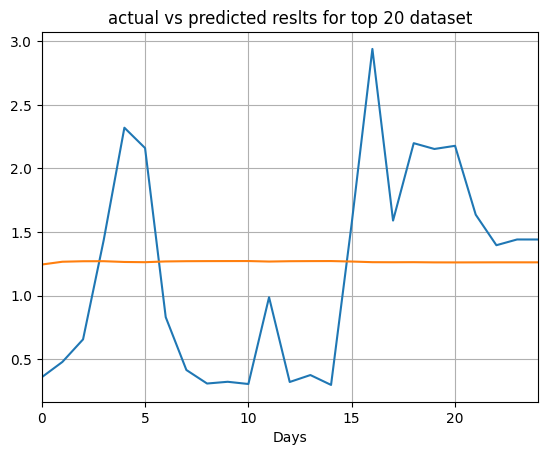

In [ ]:
plt.title('actual vs predicted reslts for top 20 dataset') # giving the title to the plot we are going to make
plt.xlabel('Days')  # the x axis will be nammed as "Days"
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(y_whole_data_set_test[:25]) # Plotting the top 25 values of the actual dataset
plt.plot(Tensor_for_collecting_tes_prediction[:25]) # Plotting the top 25 values of the predicted dataset
plt.show()

# *** (i) Split the dataset into train (70%) and test(30%) and do the basic preprocessing. ***

In [ ]:
# Since our data set shape is (2075259, 7), so the data entries are total 2075259 , hence we want to split the data set  into the training (80%) and validation and testing (20%) set
# so we are using the splitting function from the respective libraries
# traing part after 70% will get the total of 1452681
# and the rest will be about total

whole_data_set_numeric = whole_data_set.values
numberof_whole_data_set_train = 24212

# splitting the data set according to the given conditions in the question
# this fallowing line is for the training dataset
whole_data_set_train = whole_data_set_numeric[:numberof_whole_data_set_train, :]
# this fallowing line is for the testing dataset
whole_data_set_test = whole_data_set_numeric[numberof_whole_data_set_train:, :]


# now extracting the features and the target values for the supervised learning  technique for the trainig dataset
X_whole_data_set_train, y_whole_data_set_train = whole_data_set_train[:,1:], whole_data_set_train[:,0]
# now extracting the features and the target values for the supervised learning  technique for the testing dataset
X_whole_data_set_test, y_whole_data_set_test = whole_data_set_test[:,1:],whole_data_set_test[:,0]

X_whole_data_set_train = X_whole_data_set_train.reshape((X_whole_data_set_train.shape[0], 1, X_whole_data_set_train.shape[1]))
X_whole_data_set_test = X_whole_data_set_test.reshape((X_whole_data_set_test.shape[0], 1, X_whole_data_set_test.shape[1]))

In [ ]:
# just for the varification that the splitt is done properly , we are pring the shape of the above work
print(X_whole_data_set_train.shape,y_whole_data_set_train.shape,X_whole_data_set_test.shape,y_whole_data_set_test.shape)


(24212, 1, 7) (24212,) (10376, 1, 7) (10376,)


In [ ]:
# now we making our whole training feature dataset into the tensor for the further processing
X_whole_data_set_train = torch.FloatTensor(X_whole_data_set_train)

In [ ]:
# here we are transforming my dtaset to the tensor
y_whole_data_set_train = torch.FloatTensor(y_whole_data_set_train)

In [ ]:
# converteing my dataset into the sequences
my_training_sequence_is = making_seq_of_my_dataset(X_whole_data_set_train, How_much_seq_want)

In [ ]:
num_of_epoc = 15 # here we are defining the number of epoch for which my model will be trained out

for i in range(num_of_epoc):   # we are cresting a for loop for the epoch training
    for seq, labels in my_training_sequence_is: # we are taking each datapoint for the further processing
        my_model_opti.zero_grad()        # here we are taking the optimization function
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),  # here we are calling the hidden cell of the LSTM model
                        torch.zeros(1, 1, model.hidden_layer_size))

        model_prediction_values = model(seq)  # here we are obtaining the values predicted by my model

        alone_loss_val1 = my_prediction_loss_definition(model_prediction_values, y_whole_data_set_train)  # here we are calculating the loss function for my model predction
        alone_loss_val1.backward()  #here we are giving back this loss to the further processing
        my_model_opti.step()        # here we are again introducing our new optimized values

    if i%1 == 1:
        print(f'epoch: {i:3} loss: {alone_loss_val1.item():10.8f}')

print(f'epoch: {i:3} loss: {alone_loss_val1.item():10.10f}')

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([24212])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:  14 loss: 0.8576800823


In [ ]:
# here we are transforming my dtaset to the tensor
X_whole_data_set_test = torch.FloatTensor(X_whole_data_set_test)

In [ ]:
# here we are transforming my dtaset to the tensor
y_whole_data_set_test = torch.FloatTensor(y_whole_data_set_test)

In [ ]:
# here we are transforming my dtaset to the tensor
test_inout_seq = making_seq_of_my_dataset(X_whole_data_set_test, How_much_seq_want)

In [ ]:
model_pred_for_testing_purposes= [] # defining a tesor for the collection of the testing prediction of the model
model_loss_for_testing_purposes=[]  # defining a tesor for the collection of the testing loss of prediction of the model
Tensor_for_collecting_tes_prediction = torch.tensor([])  # defining a tesor for the concatination of the testing prediction of the model

In [ ]:
for seq, labels in test_inout_seq: # defining the for loop for the testing dataset prediction
    with torch.no_grad():
     model_prediction_values1 = model(seq) # prediction of the values by applying the model

     alone_loss_val1 = my_prediction_loss_definition(model_prediction_values1, y_whole_data_set_test) # calculating the of single data points

     model_pred_for_testing_purposes.append(model_prediction_values1.detach().numpy()) # now appending all data
     Tensor_for_collecting_tes_prediction = torch.cat((Tensor_for_collecting_tes_prediction,model_prediction_values1)) # here we are collecting the tesors and concatinate them
     model_loss_for_testing_purposes.append(alone_loss_val1) # here we are fing the testing lopss
print(f' loss: {alone_loss_val1.item():10.10f}')

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([10376])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


 loss: 0.6690000892


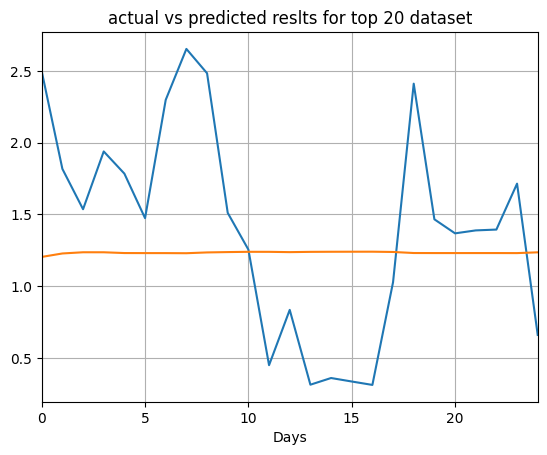

In [ ]:
plt.title('actual vs predicted reslts for top 20 dataset') # giving the title to the plot we are going to make
plt.xlabel('Days')  # the x axis will be nammed as "Days"
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(y_whole_data_set_test[:25]) # Plotting the top 25 values of the actual dataset
plt.plot(Tensor_for_collecting_tes_prediction[:25]) # Plotting the top 25 values of the predicted dataset
plt.show()